In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install xlrd

                                              0.0/96.5 kB ? eta -:--:--
     ---------------------------------        81.9/96.5 kB 2.3 MB/s eta 0:00:01
     ---------------------------------------- 96.5/96.5 kB 1.8 MB/s eta 0:00:00


In [5]:
# Import Excel file
data = pd.read_excel('Sample - Superstore.xls')

# Print the first 5 rows of the DataFrame
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# Specify the path to the Excel file
excel_file_path = ('Sample - Superstore.csv') # Replace with the actual path to your Excel file

# Specify the names of the worksheets you want to import
sheet1_name = 'Orders'  # Replace with the actual name of the first worksheet
sheet2_name = 'Returns'  # Replace with the actual name of the second worksheet
sheet3_name = 'People'   # Replace with the actual name of the second worksheet

# Import the specified worksheets into separate DataFrames
sheet1_df = pd.read_excel('Sample - Superstore.xls', sheet_name=sheet1_name)
sheet2_df = pd.read_excel('Sample - Superstore.xls', sheet_name=sheet2_name)
sheet3_df = pd.read_excel('Sample - Superstore.xls', sheet_name=sheet3_name)

In [7]:
# Merge sheet1_df and sheet2_df based on a common column (e.g., "Order ID" or any other common column)
merged_df = sheet1_df.merge(sheet2_df, on="Order ID", how="outer")

# Merge the result with sheet3_df based on a common column (e.g., "Region" or any other common column)
final_merged_df = merged_df.merge(sheet3_df, on="Region", how="left")

# Now you have a DataFrame that combines data from all three sheets

## Q1) Which Area Managers has the best performance in terms of Sales ?

In [24]:
# Assuming sheet1_df contains the data of sales and regions
# Assuming sheet3_df contains the data of Area Managers and their regions
# Merge sheet1_df and sheet3_df based on the "Region" or "Area" column
merged_df = pd.merge(sheet1_df, sheet3_df, on="Region", how="left")

# Calculate total sales for each Area Manager
area_manager_sales = merged_df.groupby("Person")["Sales"].sum().reset_index()

# # Find the Area Manager with the best performance in terms of sales
best_area_manager = area_manager_sales.loc[area_manager_sales["Sales"].idxmax()]

print("The Area Manager with the best performance in terms of sales is:", best_area_manager["Person"])
print("Total Sales:", best_area_manager["Sales"])
# area_manager_sales.head(1)

The Area Manager with the best performance in terms of sales is: Anna Andreadi
Total Sales: 725457.8245


## Q2 Which Area Manager needs to be fired or demoted as having the Highest Returns ?


In [34]:
# Define a mapping dictionary for 'Yes' and 'No'
mapping = {'Yes': 1, 'No': 0}

# Map the 'Returned' column to numeric values
final_merged_df['Returned'] = final_merged_df['Returned'].map(mapping)

# Calculate total returns for each Area Manager
area_returns = final_merged_df.groupby("Person")["Returned"].sum().reset_index()

# Find the Area Manager with the highest returns
manager_with_highest_returns = area_returns.loc[area_returns['Returned'].idxmax()]["Person"]

print('Below Manager needs to be fired or demoted as they have the Highest Returns:')
print(manager_with_highest_returns)

Below Manager needs to be fired or demoted as they have the Highest Returns:
Anna Andreadi


## Q3 Which Area Manager has highest on an average delay in orders of dispatch from order date and shipment date give a sub category wise average delay in orders as well ? 

In [10]:
# Assuming final_merged_df contains the merged data
# Convert "Order Date" and "Ship Date" to datetime
final_merged_df["Order Date"] = pd.to_datetime(final_merged_df["Order Date"])
final_merged_df["Ship Date"] = pd.to_datetime(final_merged_df["Ship Date"])

# Calculate the delay in orders
final_merged_df["Order_Shipment_Delay"] = (final_merged_df["Ship Date"] - final_merged_df["Order Date"]).dt.days

# Calculate the average delay for each Area Manager
area_manager_avg_delay = final_merged_df.groupby("Person")["Order_Shipment_Delay"].mean().reset_index()

# Find the Area Manager with the highest average delay
manager_with_highest_avg_delay = area_manager_avg_delay.loc[area_manager_avg_delay['Order_Shipment_Delay'].idxmax()]

# Calculate the subcategory-wise average delay
subcategory_avg_delay = final_merged_df.groupby("Sub-Category")["Order_Shipment_Delay"].mean().reset_index()

# Display the results
print("Area Manager with the highest average delay in orders:")
print("Manager:", manager_with_highest_avg_delay["Person"])
print("Average Delay (days):", manager_with_highest_avg_delay["Order_Shipment_Delay"])

print("\nSubcategory-wise average delay in orders:")
print(subcategory_avg_delay)

Area Manager with the highest average delay in orders:
Manager: Kelly Williams
Average Delay (days): 4.058114507102884

Subcategory-wise average delay in orders:
   Sub-Category  Order_Shipment_Delay
0   Accessories              3.886452
1    Appliances              3.989270
2           Art              4.054020
3       Binders              4.022324
4     Bookcases              3.811404
5        Chairs              3.899514
6       Copiers              3.617647
7     Envelopes              4.015748
8     Fasteners              3.976959
9   Furnishings              3.961338
10       Labels              4.002747
11     Machines              3.747826
12        Paper              3.887591
13       Phones              4.001125
14      Storage              3.975177
15     Supplies              4.015789
16       Tables              3.893417


##  Q4 What are the Top 5 sub-categories and how much percent of total value and percent of total volume is stored?

In [11]:
# Find the top 5 subcategories and their % of total value sold
subcategory_sales = data.groupby("Sub-Category")["Sales"].sum().reset_index()
subcategory_sales["Percentage of Total Sales"] = (subcategory_sales["Sales"] / subcategory_sales["Sales"].sum()) * 100
top_5_subcategories = subcategory_sales.nlargest(5, "Sales")
top_5_subcategories = top_5_subcategories.rename(columns={"Percentage of Total Sales": "Percentage-of-Total-Sales"})
print("Top 5 subcategories by % of total value sold:")
print(top_5_subcategories[["Sub-Category", "Percentage-of-Total-Sales"]])

Top 5 subcategories by % of total value sold:
   Sub-Category  Percentage-of-Total-Sales
13       Phones                  14.365616
5        Chairs                  14.297796
14      Storage                   9.744190
16       Tables                   9.009466
3       Binders                   8.854808


##  Q5 Give the top 5 states who has more improved sales figures in terms of sales in year 2016 vs 2017.
## Also share your comment, for the reason (root cause analysis) behind their improvised sales) mention the growth factors to whom these growth can be attributed and create a column chart for all the states for 2016 vs 2017

In [12]:
# Filter data for the year 2016 and 2017
data_2016 = final_merged_df[final_merged_df['Order Date'].dt.year == 2016]
data_2017 = final_merged_df[final_merged_df['Order Date'].dt.year == 2017]

# Calculate total sales for each state in 2016 and 2017
sales_2016 = data_2016.groupby("State")["Sales"].sum().reset_index()
sales_2017 = data_2017.groupby("State")["Sales"].sum().reset_index()

# Merge the two DataFrames to compare sales between the two years
sales_comparison = pd.merge(sales_2016, sales_2017, on="State", suffixes=("_2016", "_2017"))

# Calculate the improvement in sales
sales_comparison["Sales_Improvement"] = sales_comparison["Sales_2017"] - sales_comparison["Sales_2016"]

# Sort by sales improvement in descending order and select the top 5 states
top_5_improvement = sales_comparison.sort_values(by="Sales_Improvement", ascending=False).head(5)

# Print the top 5 states with sales improvement and their improvement figures
print("Top 5 States with Most Improved Sales (2016 vs. 2017):")
print(top_5_improvement[["State", "Sales_Improvement"]])

Top 5 States with Most Improved Sales (2016 vs. 2017):
         State  Sales_Improvement
41  Washington          45725.612
28    New York          22078.893
3   California          14836.433
36   Tennessee          12983.329
8      Florida          12841.432


Now, let's analyze some potential growth factors attributed to the improved sales in these states:

California:

~High Economic Activity: California has a robust economy with diverse industries, contributing to increased business opportunities.
~Population Growth: A growing population means a larger customer base.
~Tech Industry: The presence of the tech industry can drive higher spending on office equipment and technology products.

New York:

~Financial Hub: New York is a global financial center, leading to increased sales in financial services and related products.
~Tourism: New York City attracts tourists, resulting in higher retail sales.
~Luxury Market: High-end retailers in New York cater to luxury consumers.


Washington:

~Tech Industry: Washington is home to tech giants like Amazon and Microsoft, impacting office and tech equipment sales.
~Innovation: Innovation and research-driven industries contribute to increased demand for office supplies.
~Growing Startups: A thriving startup ecosystem leads to higher spending on business essentials.

Tennessee:

~Local Initiatives: Statewide programs or initiatives supporting local businesses could have boosted sales.
~Supply Chain Improvements: Streamlining supply chain operations might have led to better product availability and faster deliveries.
~Customer Engagement: Engaging customers through loyalty programs or personalized offers may have increased sales.

Florida:

~Tourism Impact: If Florida is a tourist destination, an increase in tourism could have driven sales in various industries.
~Seasonal Trends: Seasonal businesses might have thrived during peak seasons, contributing to overall sales growth.
~Online Presence: A strong online presence and e-commerce strategies may have expanded the customer base.

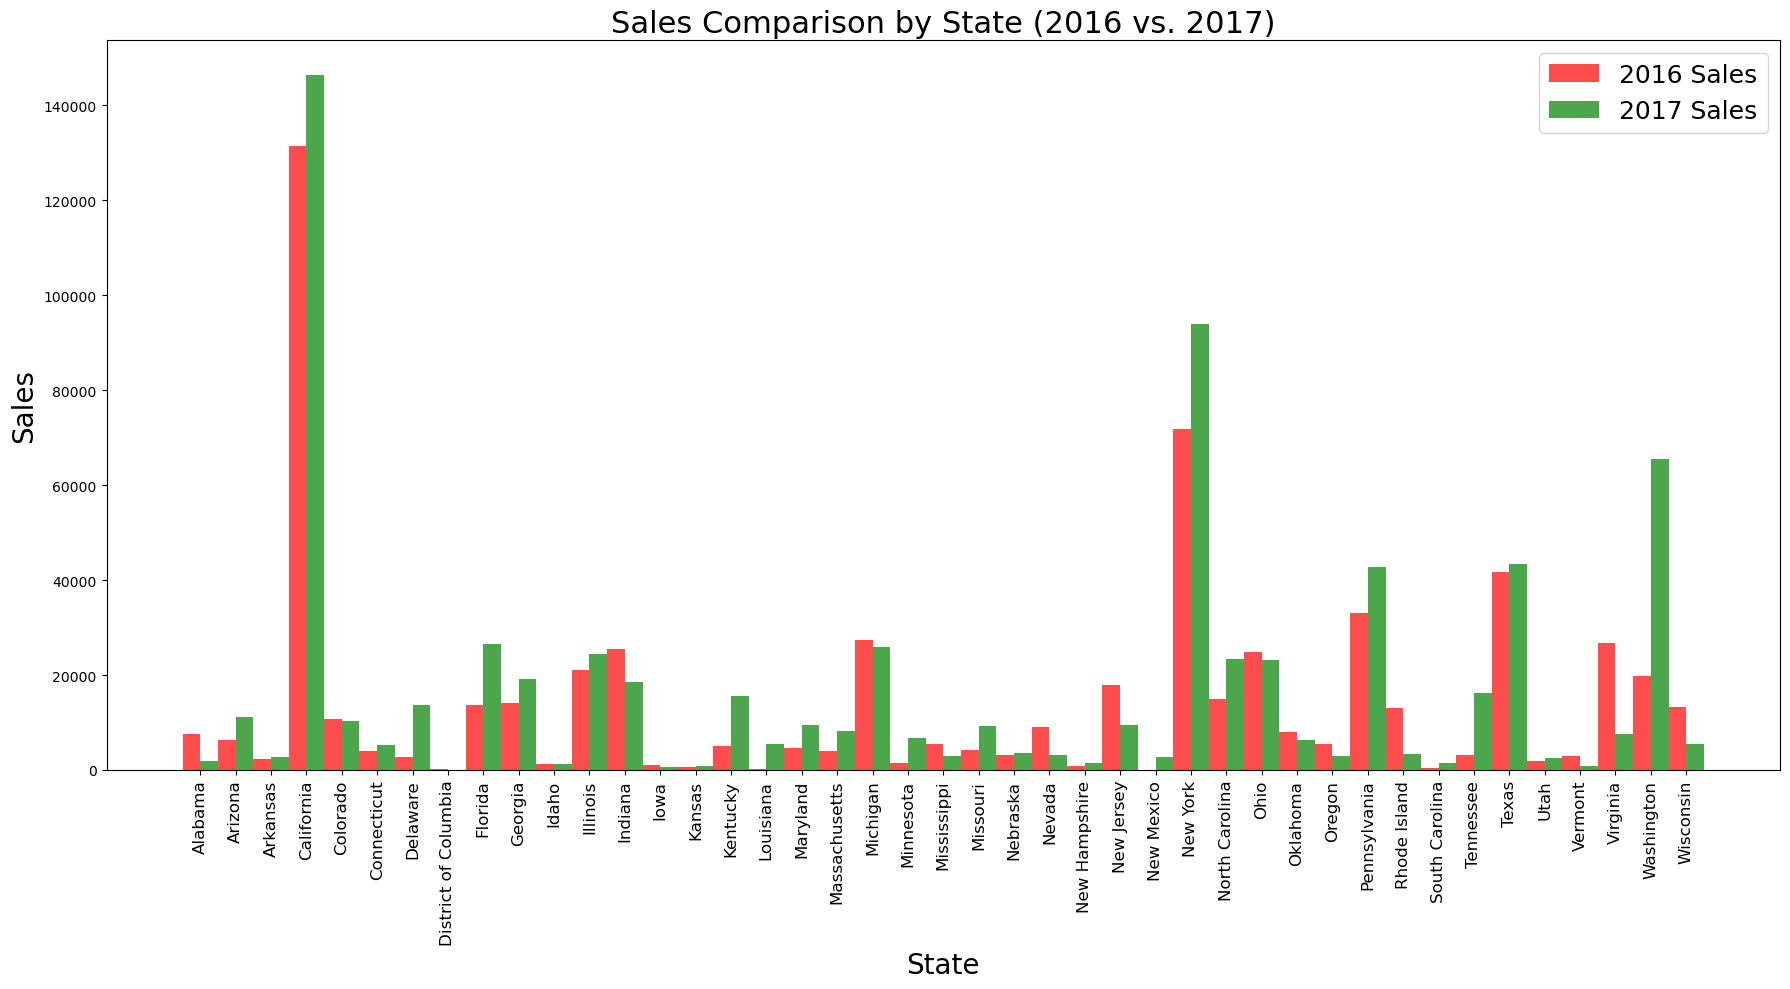

In [13]:
# Assuming sales_comparison contains the data
# Sort the data by State for better alignment
sales_comparison = sales_comparison.sort_values(by="State")

# Create figure and axis
fig, ax = plt.subplots(figsize=(18, 10))

# Get the list of state names from the data
state_labels = sales_comparison["State"]

# Define the width of each bar group (increased for thicker bars)
bar_width = 0.5  # Adjust the width as needed

# Set the positions for the bars
index = np.arange(len(sales_comparison))

# Create a bar for 2016 sales
bar1 = plt.bar(index - bar_width/2, sales_comparison["Sales_2016"], bar_width, label="2016 Sales", color='red', alpha=0.7)

# Create a bar for 2017 sales
bar2 = plt.bar(index + bar_width/2, sales_comparison["Sales_2017"], bar_width, label="2017 Sales", color='green', alpha=0.7)

# Set x-axis tick labels to state_labels
ax.set_xticks(index)
ax.set_xticklabels(state_labels, rotation=90, fontsize=12)  # Increase the font size

# Add labels and a legend with increased font size
plt.xlabel("State", fontsize=20)  # Increase x-axis label font size
plt.ylabel("Sales", fontsize=20)  # Increase y-axis label font size
plt.title("Sales Comparison by State (2016 vs. 2017)", fontsize=22)  # Increase title font size
plt.legend(fontsize=18)  # Increase legend font size

# Show the chart
plt.tight_layout()
plt.show()

## Q6 Which Area Manager has the best performance in terms of Sales Improvement (2016 to 2017) ?

In [14]:
# Filter data for the year 2016 and 2017
data_2016 = final_merged_df[final_merged_df['Order Date'].dt.year == 2016]
data_2017 = final_merged_df[final_merged_df['Order Date'].dt.year == 2017]

# Calculate total sales for each Area Manager in 2016 and 2017
sales_2016 = data_2016.groupby("Person")["Sales"].sum().reset_index()
sales_2017 = data_2017.groupby("Person")["Sales"].sum().reset_index()

# Merge the two DataFrames to compare sales between the two years
sales_comparison = pd.merge(sales_2016, sales_2017, on="Person", suffixes=("_2016", "_2017"))

# Calculate the improvement in sales
sales_comparison["Sales_Improvement"] = sales_comparison["Sales_2017"] - sales_comparison["Sales_2016"]

# Sort by sales improvement in descending order
sales_comparison = sales_comparison.sort_values(by="Sales_Improvement", ascending=False).head(5)

# Get the Area Manager with the best sales improvement
best_area_manager = sales_comparison.head(5)

# Print the Area Manager with the best sales improvement
print("Area Manager with the Best Sales Improvement (2016 to 2017):")
print(best_area_manager[["Person", "Sales_Improvement"]])

Area Manager with the Best Sales Improvement (2016 to 2017):
              Person  Sales_Improvement
0      Anna Andreadi         62648.1890
2        Chuck Magee         32397.0820
1  Cassandra Brandow         29295.6340
3     Kelly Williams          -331.2478


## Q7 Which Area Manager needs to be fired or demoted as having the highest return value based on 2017 vs 2016?

In [15]:
# Calculate total returns for each Area Manager in 2016 and 2017
returns_2016 = data_2016[data_2016['Returned'] == 1.0].groupby("Person")["Returned"].count().reset_index()
returns_2017 = data_2017[data_2017['Returned'] == 1.0].groupby("Person")["Returned"].count().reset_index()

# Merge the two DataFrames to compare returns between the two years
returns_comparison = pd.merge(returns_2016, returns_2017, on="Person", suffixes=("_2016", "_2017"))

# Calculate the increase in returns
returns_comparison["Return_Increase"] = returns_comparison["Returned_2017"] - returns_comparison["Returned_2016"]

# Sort by return increase in descending order
returns_comparison = returns_comparison.sort_values(by="Return_Increase", ascending=False).reset_index(drop=True)

# Check if there are any Area Managers with return increases
if not returns_comparison.empty:
    # Get the Area Manager with the highest return increase
    worst_area_manager = returns_comparison.iloc[0]

    # Print the Area Manager with the highest return increase
    print("Area Manager with the Highest Return Increase (2017 vs. 2016):")
    print(worst_area_manager[["Person", "Return_Increase"]])
else:
    print("No Area Manager had a return increase in 2017 compared to 2016.")

Area Manager with the Highest Return Increase (2017 vs. 2016):
Person             Anna Andreadi
Return_Increase               63
Name: 0, dtype: object


## Q8 How much year on year growth rate sales has been improved(CAGR) per region for the given years?

## PER REGION (CAGR)

In [16]:
# Filter data for the specified years
data_start = final_merged_df[final_merged_df['Order Date'].dt.year == 2014]
data_end = final_merged_df[final_merged_df['Order Date'].dt.year == 2017]

# Calculate total sales for each region in the start and end years
sales_start = data_start.groupby("Region")["Sales"].sum().reset_index()
sales_end = data_end.groupby("Region")["Sales"].sum().reset_index()

# Merge the two DataFrames to compare sales between the two years
sales_comparison = pd.merge(sales_start, sales_end, on="Region", suffixes=("_2014", "_2017"))

# Calculate the CAGR for each region
sales_comparison["CAGR"] = ((sales_comparison["Sales_2017"] / sales_comparison["Sales_2014"]) ** (1 / 3)) - 1  # Since it's year-on-year over 3 years

# Convert CAGR to a percentage and round off to 2 decimal places
sales_comparison["CAGR"] = (sales_comparison["CAGR"] * 100).round(2)

# Sort the DataFrame by CAGR in descending order
sales_comparison = sales_comparison.sort_values(by="CAGR", ascending=False)

# Print the sorted CAGR for each region
print("CAGR of Sales (2014-2017) by Region:")
print(sales_comparison[["Region", "CAGR"]])

CAGR of Sales (2014-2017) by Region:
    Region   CAGR
3     West  19.15
1     East  18.31
0  Central  12.31
2    South   5.78


## Overall (CAGR)

In [17]:
# Filter data for the specified years
data_start = final_merged_df[final_merged_df['Order Date'].dt.year == 2014]
data_end = final_merged_df[final_merged_df['Order Date'].dt.year == 2017]

# Calculate total sales for all regions in the start and end years
total_sales_start = data_start["Sales"].sum()
total_sales_end = data_end["Sales"].sum()

# Calculate the overall CAGR
overall_cagr = ((total_sales_end / total_sales_start) ** (1 / 3)) - 1  # Since it's year-on-year over 3 years

# Convert CAGR to a percentage and round off to 2 decimal places
overall_cagr_percentage = (overall_cagr * 100).round(2)

# Print the overall CAGR
print("Overall CAGR of Sales (2014-2017):", overall_cagr_percentage)

Overall CAGR of Sales (2014-2017): 14.83
